# Análisis del Riesgo Financiero de Apple (AAPL) usando Value at Risk (VaR) y Expected Shortfall (ES)
En este proyecto, se realizó un análisis del riesgo financiero asociado con las acciones de Apple Inc. (AAPL) usando datos históricos de acciones que obtuvimos de Yahoo Finance. Se utilizo dos de las principales métricas utilizadas en la industria financiera: Value at Risk (VaR) y Expected Shortfall (ES). Estas herramientas permiten a los inversores y gestores de portafolios cuantificar y gestionar el riesgo de pérdidas en los mercados financieros.

* El Value at Risk (VaR) mide la pérdida máxima esperada durante un horizonte temporal específico con un determinado nivel de confianza (por ejemplo, 95%). A través de diferentes métodos —histórico, paramétrico y simulación de Monte Carlo—, se evaluó el VaR de las acciones de AAPL para entender la magnitud de las posibles pérdidas en condiciones normales de mercado.

* Complementando este análisis, calcularemos el Expected Shortfall (ES), que ofrece una medida más robusta al estimar la pérdida promedio en los escenarios donde se excede el VaR. De esta forma, podremos tener una visión más completa del riesgo, especialmente en eventos extremos o en situaciones de alta volatilidad.

Los atributos de la data utiizada son:

1. Adj Close: Precio de cierre ajustado, refleja el precio de cierre de la acción, pero modificado para tener en cuenta eventos corporativos como dividendos, splits de acciones, o nuevas emisiones de acciones.
2. Close: Precio de cierre, es el último precio al que se negociaron las acciones durante el horario normal del mercado. No toma en cuenta los ajustes por dividendos o splits.
3. High: Precio más alto al que se negociaron las acciones durante una sesión de mercado
4. Low: Precio más bajo al que se negociaron las acciones durante una sesión de mercado.
5. Open: Precio de apertura, es el precio al que se realizó la primera transacción de la acción al inicio de la sesión de mercado.
6. Volume: Volumen, representa el número total de acciones negociadas durante una sesión de mercado.
7. Return: Retorno, miden el cambio porcentual en el precio de cierre ajustado de un día a otro.

Contenido:
1. Load and Check Data
2. Summary data
3. Data cleaning.
4. VaR and backtesting
5. Expected Shortfall
6. Conclusions


## 1. Load and Check Data

In [ ]:
# Paquetes a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

In [101]:
# Descarga de los datos de AAPL (Apple)
data = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
data.head()  # Nos muestra los primeros registros

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02 00:00:00+00:00,24.373957,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05 00:00:00+00:00,23.687307,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06 00:00:00+00:00,23.689537,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07 00:00:00+00:00,24.021717,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08 00:00:00+00:00,24.944685,27.972500,28.037500,27.174999,27.307501,237458000


## 2. Summary data

In [102]:
#  Primeras filas 
print(data.head())

# Información general 
print(data.info())

# Resumen estadístico
print(data.describe())


Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2015-01-02 00:00:00+00:00  24.373957  27.332500  27.860001  26.837500   
2015-01-05 00:00:00+00:00  23.687307  26.562500  27.162500  26.352501   
2015-01-06 00:00:00+00:00  23.689537  26.565001  26.857500  26.157499   
2015-01-07 00:00:00+00:00  24.021717  26.937500  27.049999  26.674999   
2015-01-08 00:00:00+00:00  24.944685  27.972500  28.037500  27.174999   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2015-01-02 00:00:00+00:00  27.847500  212818400  
2015-01-05 00:00:00+00:00  27.072500  257142000  
2015-01-06 00:00:00+00:00  26.635000  263188400  
2015-01-07 00:00:00+00:00  26.799999  160423600  
2015-01-08 00:00:00+00:00  27.307501  237458000  
<class 'pandas.

* Cantidad de datos: El conjunto de datos tiene 2014 entradas desde el 2 de enero de 2015 hasta el 30 de diciembre de 2022.
* Estadísticas descriptivas:
    - Los valores promedio de estas columnas rondan los 70-73 USD, lo que nos indica que durante este periodo de tiempo el precio promedio de AAPL estuvo en ese rango.
    - El valor máximo de las acciones llegó a 182.63 USD en el precio de apertura, mientras que el mínimo fue 22.50 USD. Esto refleja un crecimiento significativo en el valor de la acción durante el periodo analizado.
    - El precio de cierre ajustado es ligeramente inferior al precio de cierre estándar, lo cual es típico ya que ajusta factores como dividendos y splits de acciones.
    - El volumen promedio de transacciones diarias es de aproximadamente 131.7 millones de acciones y alcanzó cerca de 648.8 millones de acciones, lo que puede estar asociado con eventos importantes.
* Distribución de los datos:
    - Hay una gran variabilidad en los precios, con una desviación estándar de aproximadamente 49 USD en todas las columnas de precios, lo que sugiere fluctuaciones significativas en los valores de las acciones a lo largo del tiempo.
    - Los cuartiles (25%, 50%, 75%) muestran que, aunque los precios mínimos fueron bajos en los primeros años (mas o menos 22 USD), la mediana de los precios está en torno a los 48 USD, lo que indica un aumento consistente a lo largo del tiempo.


## 3. Data cleaning

In [103]:
# Verificamos valores nulos
print(data.isnull().sum())


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


* Las columnas Adj Close, Close, High, Low, Open, y Volume no tienen valores nulos.
* La columna Return, tiene 2014 valores nulos. No se han calculado los retornos para este conjunto de datos por lo cual se realizará el cálculo correspondiente:

### Cálculo de Return

In [104]:
#Columnas del DataFrame
print(data.columns)


MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [105]:
# Acceso a la columna 'Adj Close' de AAPL
adj_close = data[('Adj Close', 'AAPL')]

# Tipo de dato
print(adj_close.dtype)

# Valores nulos
print(adj_close.isnull().sum())


float64
0


In [106]:
# Cálculo de los retornos logarítmicos
data[('Return', 'AAPL')] = np.log(data[('Adj Close', 'AAPL')] / data[('Adj Close', 'AAPL')].shift(1))

# Resultados
print(data[[('Adj Close', 'AAPL'), ('Return', 'AAPL')]].head())


Price                      Adj Close    Return
Ticker                          AAPL      AAPL
Date                                          
2015-01-02 00:00:00+00:00  24.373957       NaN
2015-01-05 00:00:00+00:00  23.687307 -0.028576
2015-01-06 00:00:00+00:00  23.689537  0.000094
2015-01-07 00:00:00+00:00  24.021717  0.013925
2015-01-08 00:00:00+00:00  24.944685  0.037702


## 4. Data Visualization


### Precio de cierre ajustándolo a lo largo del tiempo


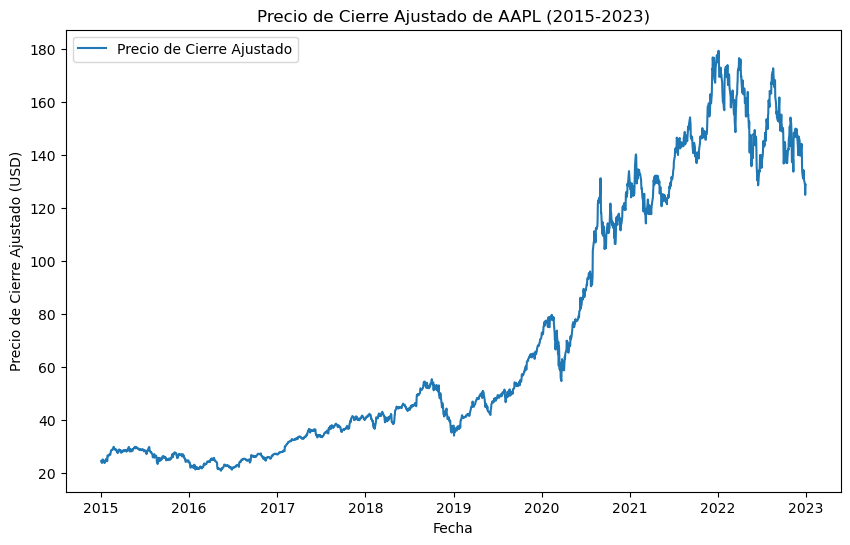

In [107]:
# Gráfico del precio de cierre ajustado
plt.figure(figsize=(10,6))
plt.plot(data['Adj Close'], label='Precio de Cierre Ajustado')
plt.title('Precio de Cierre Ajustado de AAPL (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()


El precio de cierre ajustado de AAPL muestra un crecimiento constante entre 2015 y 2021, alcanzando un máximo en 2022 de más de 180 USD. A partir de ahí, se observa una corrección significativa, reflejando la volatilidad reciente del mercado.


### Volumen de transacciones

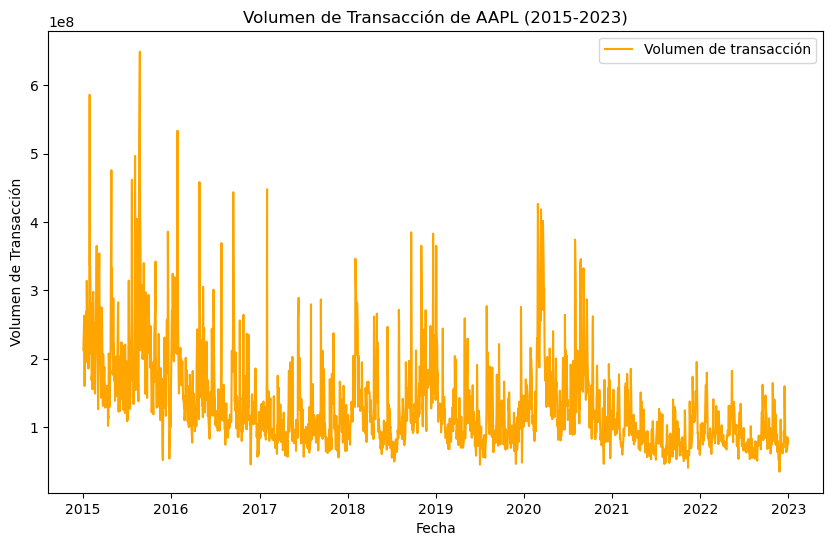

In [108]:
# Gráfico del volumen de transacciones
plt.figure(figsize=(10,6))
plt.plot(data['Volume'], color='orange', label='Volumen de transacción')
plt.title('Volumen de Transacción de AAPL (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Transacción')
plt.legend()
plt.show()


El volumen de transacciones de AAPL muestra una tendencia decreciente, con picos de alta actividad en ciertos periodos, particularmente en 2015 y alrededor de 2020. Esta disminución podría reflejar una menor volatilidad o interés en el trading diario durante los últimos años.

### Matriz de correlación

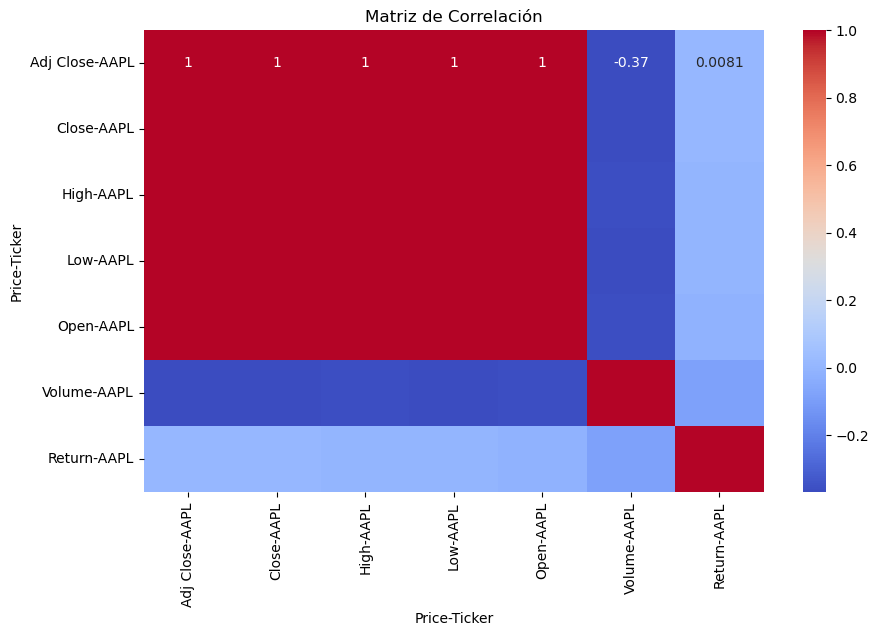

In [109]:
# Calcular la matriz de correlación
corr = data.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


La matriz de correlación muestra una fuerte relación positiva entre los precios de apertura, cierre, máximos y mínimos de AAPL (correlaciones cercanas a 1), lo cual es esperado. Sin embargo, el volumen de transacciones tiene una correlación negativa con los precios (aproximadamente -0.37), indicando que aumentos en el volumen no necesariamente coinciden con subidas en los precios. Además, los retornos diarios tienen una correlación cercana a cero con el volumen, lo que sugiere poca relación entre ambos.

### Visualización de los retornos

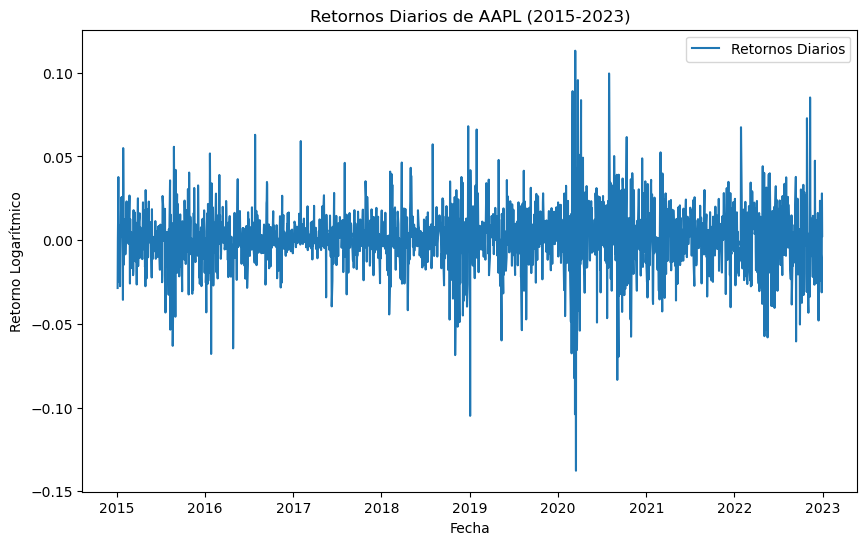

In [110]:
# Grafico de los retornos logarítmicos a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'AAPL')], label='Retornos Diarios')
plt.title('Retornos Diarios de AAPL (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Logarítmico')
plt.legend()
plt.show()


Los retornos diarios de AAPL entre 2015 y 2023 muestran una alta volatilidad, con oscilaciones más fuertes durante 2020, probablemente relacionadas con la incertidumbre del mercado debido al COVID-19. 

### Distribución de los retornos diarios

C:\Users\Caleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


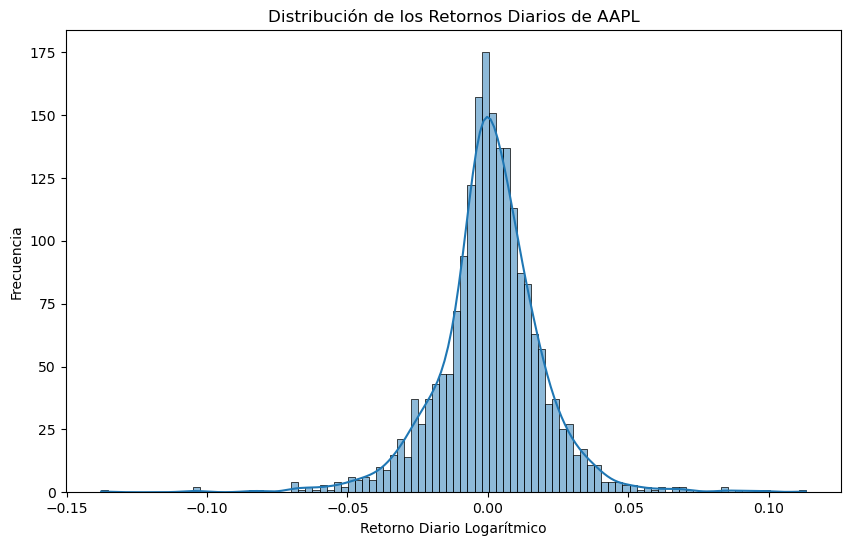

In [111]:
# Grafico de la distribución de los retornos diarios
plt.figure(figsize=(10,6))
sns.histplot(data[('Return', 'AAPL')].dropna(), bins=100, kde=True)
plt.title('Distribución de los Retornos Diarios de AAPL')
plt.xlabel('Retorno Diario Logarítmico')
plt.ylabel('Frecuencia')
plt.show()


La distribución de los retornos diarios logarítmicos de AAPL entre 2015 y 2023 muestra una forma cercana a la normal, centrada alrededor de cero, con una leve asimetría hacia los valores negativos. La mayoría de los retornos se agrupan en torno a pequeñas variaciones diarias, pero se observan algunas colas largas, lo que indica la presencia de eventos de mayor volatilidad tanto en dirección positiva como negativa.

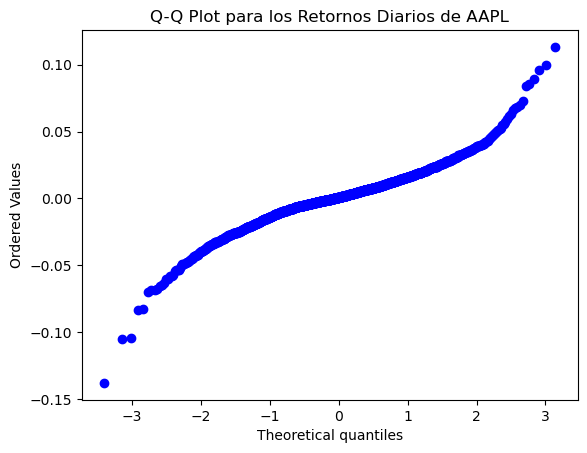

In [112]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear el Q-Q plot para los retornos
stats.probplot(data[('Return', 'AAPL')], dist="norm", plot=plt)
plt.title('Q-Q Plot para los Retornos Diarios de AAPL')
plt.show()


El Q-Q plot confirma que no sigue una distribución normal. Si los datos siguieran una distribución normal, los puntos deberían alinearse en una línea recta a lo largo de la diagonal del gráfico. En cambio, se observa una curvatura tanto en las colas inferiores como superiores, esto indica colas más pesadas que las de una distribución normal por lo tanto  hay más eventos extremos de los que se esperaría bajo una distribución normal.

### Volatilidad de AAPL

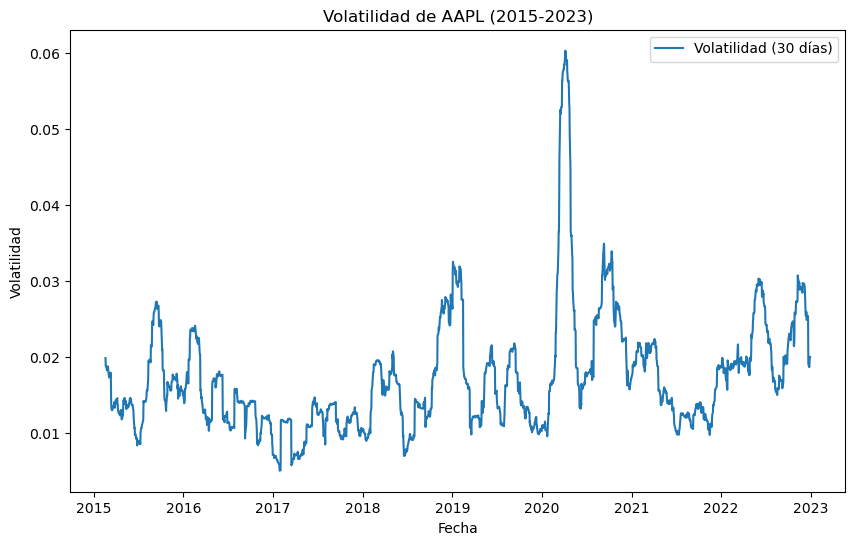

In [114]:
# Calculo de la volatilidad (desviación estándar móvil de 30 días)
data[('Volatility', 'AAPL')] = data[('Return', 'AAPL')].rolling(window=30).std()

# Grafico de la volatilidad
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Volatility', 'AAPL')], label='Volatilidad (30 días)')
plt.title('Volatilidad de AAPL (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.show()


La volatilidad de AAPL, calculada con una ventana de 30 días, muestra picos notables con un aumento drástico en 2020, coincidiendo probablemente con la  pandemia de COVID-19. Fuera de este periodo, la volatilidad tiende a fluctuar entre 0.01 y 0.03, pero el pico en 2020 alcanza más de 0.06, lo que indica una fase de alta inestabilidad en el precio de las acciones de Apple durante ese año.

### Sesgos y curtosis

In [55]:
# Cálculo de sesgo (asimetría) y curtosis
skewness = data[('Return', 'AAPL')].skew()
kurtosis = data[('Return', 'AAPL')].kurtosis()
print(f"Sesgo: {skewness}")
print(f"Curtosis: {kurtosis}")


Sesgo: -0.2194395126669601
Curtosis: 5.2437691484493865


Los retornos de AAPL muestran una leve asimetría negativa y una curtosis alta, lo que indica una mayor probabilidad de eventos extremos (grandes pérdidas o ganancias). Esto es importante porque nos sugiere utilizar métodos no paramétricos como el VaR histórico o simulación de Monte Carlo para estimar el riesgo de manera más precisa.

## 4. VaR and backtesting

### Método Histórico

In [117]:
var_95 = np.percentile(data[('Return', 'AAPL')].dropna(), 5)
print(f"VaR Histórico al 95%: {var_95:.2%}")


VaR Histórico al 95%: -2.93%


### Método Paramétrico (Normal)

In [118]:
mean = data[('Return', 'AAPL')].mean()
std_dev = data[('Return', 'AAPL')].std()
var_parametrico_95 = mean - 1.65 * std_dev
print(f"VaR Paramétrico al 95%: {var_parametrico_95:.2%}")


VaR Paramétrico al 95%: -3.03%


 ### Simulaciones de Monte Carlo

In [120]:
from scipy.stats import t
df = 5  # grados de libertad, ajustable
simulations = t.rvs(df, loc=mean, scale=std_dev, size=10000)
var_montecarlo_t_95 = np.percentile(simulations, 5)
print(f"VaR Monte Carlo con t al 95%: {var_montecarlo_t_95:.2%}")


VaR Monte Carlo con t al 95%: -3.62%


Los tres métodos (Histórico, Paramétrico y Monte Carlo) muestran resultados consistentes en términos de riesgo, con pequeñas variaciones en el cálculo del VaR. El VaR Paramétrico y VaR Monte Carlo presentan un VaR ligeramente más conservador, reflejando que estos métodos asumen una distribución normal y, en el caso de Monte Carlo, la simulación captura con mayor flexibilidad los eventos extremos.

### Backtesting para método histórico

In [121]:
# Cálculo del backtesting para método histórico
violations_historic = data[('Return', 'AAPL')] < -var_95
num_violations_historic = violations_historic.sum()
print(f"Número de violaciones del VaR: {num_violations_historic}")



Número de violaciones del VaR: 1915


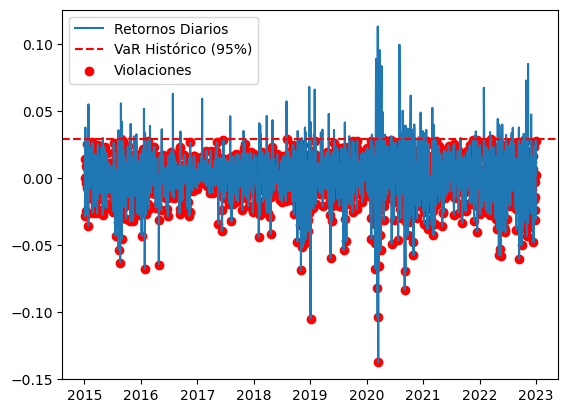

In [128]:
violations_historic = data[('Return', 'AAPL')] < -var_95
plt.plot(data.index, data[('Return', 'AAPL')], label='Retornos Diarios')
plt.axhline(y=-var_95, color='r', linestyle='--', label='VaR Histórico (95%)')
plt.scatter(data.index[violations_historic], data[('Return', 'AAPL')][violations_historic], color='red', label='Violaciones')
plt.legend()
plt.show()



### Backtesting para método paramétrico

In [125]:
# Cálculo del backtesting para método paramétrico
violations_parametrico = data[('Return', 'AAPL')] < -var_parametrico_95
num_violations_parametrico = violations_parametrico.sum()
print(f"Número de violaciones del VaR: {num_violations_parametrico}")

Número de violaciones del VaR: 1922


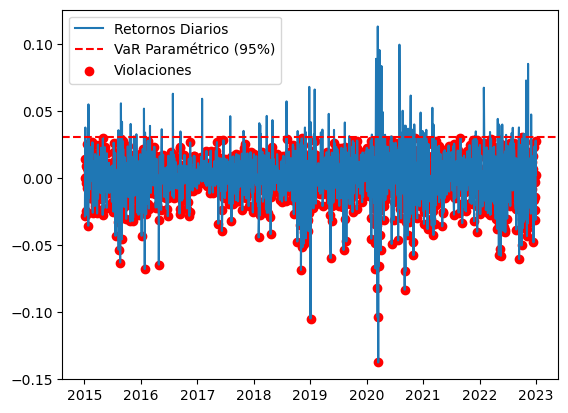

In [129]:
violations_parametrico = data[('Return', 'AAPL')] < -var_parametrico_95
plt.plot(data.index, data[('Return', 'AAPL')], label='Retornos Diarios')
plt.axhline(y=-var_parametrico_95, color='r', linestyle='--', label='VaR Paramétrico (95%)')
plt.scatter(data.index[violations_parametrico], data[('Return', 'AAPL')][violations_parametrico], color='red', label='Violaciones')
plt.legend()
plt.show()



### Backtesting para simulación de montecarlo

In [130]:
# Cálculo del backtesting para simulación de montecarlo
violations_montecarlo = data[('Return', 'AAPL')] < -var_montecarlo_t_95
num_violations_montecarlo = violations_montecarlo.sum()
print(f"Número de violaciones del VaR: {num_violations_montecarlo}")

Número de violaciones del VaR: 1960


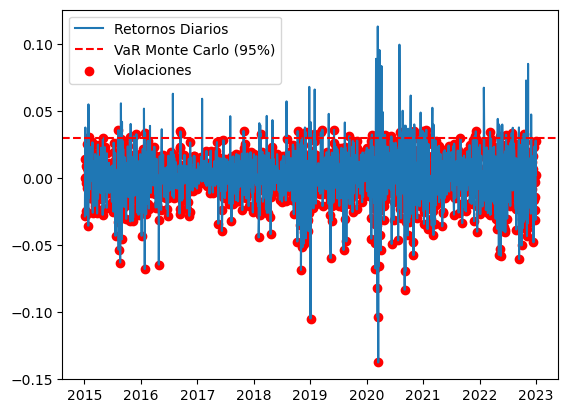

In [132]:
violations_montecarlo = data[('Return', 'AAPL')] < -var_montecarlo_t_95
plt.plot(data.index, data[('Return', 'AAPL')], label='Retornos Diarios')
plt.axhline(y=-var_montecarlo_95, color='r', linestyle='--', label='VaR Monte Carlo (95%)')
plt.scatter(data.index[violations_montecarlo], data[('Return', 'AAPL')][violations_montecarlo], color='red', label='Violaciones')
plt.legend()
plt.show()


El backtesting muestra que el número de violaciones del VaR (situaciones en las que las pérdidas superan el VaR estimado) es más alto en el método de Monte Carlo, lo cual sugiere que este método es el más conservador. El método histórico tiene el menor número de violaciones, lo que refleja que los eventos pasados son menos frecuentes que las simulaciones generadas por Monte Carlo.


## 5. Expected Shortfall 

In [133]:
# Cálculo del Expected Shortfall para VaR Histórico
ES_historic = data[('Return', 'AAPL')][data[('Return', 'AAPL')] < -var_95].mean()
print(f"Expected Shortfall (ES) Histórico al 95%: {ES_historic:.2%}")


Expected Shortfall (ES) Histórico al 95%: -0.14%


In [134]:
# Cálculo del Expected Shortfall para VaR Paramétrico
ES_parametric = data[('Return', 'AAPL')][data[('Return', 'AAPL')] < -var_parametrico_95].mean()
print(f"Expected Shortfall (ES) Paramétrico al 95%: {ES_parametric:.2%}")


Expected Shortfall (ES) Paramétrico al 95%: -0.12%


In [135]:
# Cálculo del Expected Shortfall para Monte Carlo
ES_montecarlo = np.mean(simulations[simulations < -var_montecarlo_t_95])
print(f"Expected Shortfall (ES) Monte Carlo al 95%: {ES_montecarlo:.2%}")


Expected Shortfall (ES) Monte Carlo al 95%: -0.22%


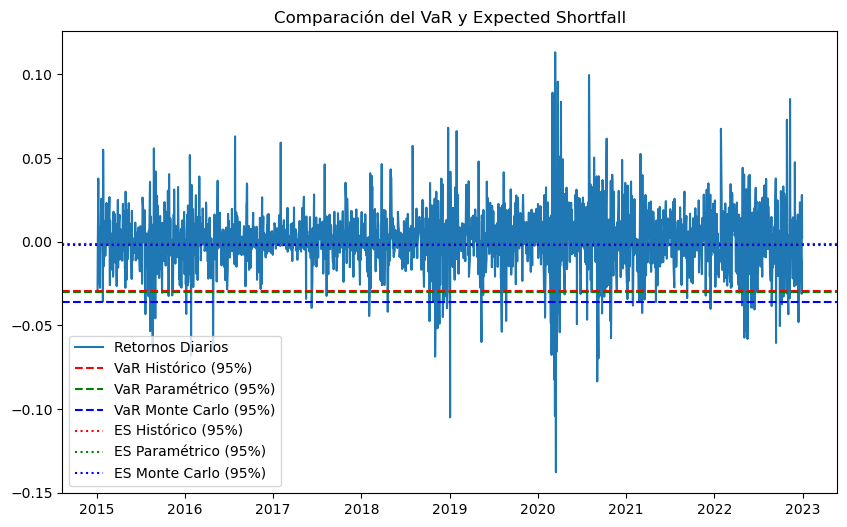

In [137]:
# Grafica de VaR y Expected Shortfall para los tres métodos
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'AAPL')], label='Retornos Diarios')
plt.axhline(y=var_95, color='r', linestyle='--', label='VaR Histórico (95%)')
plt.axhline(y=var_parametrico_95, color='g', linestyle='--', label='VaR Paramétrico (95%)')
plt.axhline(y=var_montecarlo_t_95, color='b', linestyle='--', label='VaR Monte Carlo (95%)')
plt.axhline(y=ES_historic, color='r', linestyle=':', label='ES Histórico (95%)')
plt.axhline(y=ES_parametric, color='g', linestyle=':', label='ES Paramétrico (95%)')
plt.axhline(y=ES_montecarlo, color='b', linestyle=':', label='ES Monte Carlo (95%)')
plt.legend()
plt.title('Comparación del VaR y Expected Shortfall')
plt.show()


El ES Histórico (línea roja de puntos) muestra una pérdida promedio de -0.14%, mientras que el ES Paramétrico es menor con -0.12%.Por otro lado el ES Monte Carlo (línea azul de puntos) es el más severo con -0.22%, lo que refleja una mayor sensibilidad a los eventos extremos.

Para inversores con tolerancia al riesgo moderada, el VaR Histórico puede ser una buena referencia, ya que se basa en datos pasados pero para los inversores con mayor aversión al riesgo o preocupados por eventos extremos, el VaR y ES Monte Carlo proporcionan una evaluación más realista y conservadora del riesgo extremo.

# 6. Conclusions


Se evaluó el riesgo financiero asociado con las acciones de **Apple Inc. (AAPL)** mediante la aplicación de tres enfoques principales para calcular el **Value at Risk (VaR)** y el **Expected Shortfall (ES)*
.

### Principales resultados:
1. **Value at Risk (VaR)**:
   - El **VaR Histórico** muestra que, con un 95% de confianza, la mayor pérdida esperada en un día sería de **-2.93%**, basado en datos pasados.
   - El **VaR Paramétrico**, que asume que los retornos siguen una distribución normal, ofrece un VaR de **-3.03%**.
   - El **VaR Monte Carlo** es el más conservador, con un valor de **-3.62%**, lo que indica que este método tiene en cuenta de manera más efectiva las posibles fluctuaciones extremas en el mercado.

2. **Expected Shortfall (ES)**:
   - El **Expected Shortfall (ES)** mide la pérdida promedio en casos donde las pérdidas superan el VaR. Para el **ES Histórico**, estimamos una pérdida promedio de **-0.14%**, mientras que el **ES Paramétrico** fue de **-0.12%**.
   - El **ES Monte Carlo** resultó ser el más conservador con **-0.22%**, lo que destaca que este método captura mejor el riesgo de eventos extremos.

3. **Backtesting**:
   - Al revisar las violaciones del VaR (es decir, cuando las pérdidas reales son mayores a las proyectadas por el VaR), vimos que el **VaR Monte Carlo** tuvo el mayor número de violaciones, lo que indica que este enfoque es más sensible a los riesgos extremos.

### Conclusión General:
Este análisis sugiere que tanto el **VaR** como el **ES** son herramientas útiles para evaluar el riesgo de invertir en acciones de AAPL. Los resultados del **VaR Histórico** y **Paramétrico** funcionan bien para estimar las pérdidas en condiciones de mercado normales, pero la **simulación de Monte Carlo** es mejor para capturar posibles eventos extremos, aunque es más conservadora.

Para quienes buscan invertir a **largo plazo** y tienen una **tolerancia al riesgo media-alta**, **AAPL** parece una opción viable. Sin embargo, es importante estar preparados para posibles pérdidas durante momentos de alta volatilidad, especialmente si surgen eventos inesperados en el mercado. El **Expected Shortfall** ayuda a tener una visión más clara de las pérdidas en esos momentos extremos y puede ser clave para planificar estrategias de mitigación de riesgo.

En resumen, **invertir en AAPL** es razonable, pero siempre considerando los posibles escenarios de riesgo.